<div style="direction: rtl; white-space: pre-wrap; line-height: 1.5;">


## ✅ مرحله اول: معرفی کامل پروژه

### 🔹 نام پروژه:

**"SmartLead: AI-Powered Lead Scoring System"**

### 🔹 نام فایل ژوپیتر:

**`smartlead_lead_scoring.ipynb`**

---

### 🧠 موضوع پروژه:

در این پروژه می‌خواهیم یک مدل یادگیری ماشین طراحی کنیم که بتواند **ارزش سرنخ‌های فروش (Leads)** را **پیش‌بینی** کند. یعنی بر اساس ویژگی‌های مختلفی که از هر سرنخ (lead) در اختیار داریم، بفهمیم که کدام سرنخ‌ها احتمال بیشتری برای تبدیل شدن به مشتری دارند و کدام‌ها کمتر.

---

### 🎯 هدف نهایی:

* **ساخت یک مدل طبقه‌بندی (Classification Model)** برای پیش‌بینی این‌که آیا یک سرنخ ارزش پیگیری دارد یا خیر.
* **استفاده از متریک‌های ارزیابی کاربردی** مثل:

  * **AUC (Area Under the Curve)** برای بررسی توانایی مدل در تفکیک مثبت‌ها و منفی‌ها.
  * **F1-score** برای تعادل بین Precision و Recall.
* **تحلیل ویژگی‌ها (Feature Importance)** برای اینکه بفهمیم کدام ویژگی‌ها بیشترین تاثیر را در پیش‌بینی دارند.
* **ارائه داشبورد ساده و گرافیکی** از نتایج و امتیازدهی به سرنخ‌ها.

---

### 📊 داده‌ها:

داده‌ها شامل ویژگی‌های مختلفی از سرنخ‌ها خواهند بود؛ مثل:

* منبع سرنخ (source)
* صنعت (industry)
* اندازه شرکت
* نقش تصمیم‌گیرنده
* تعاملات قبلی
* وضعیت بازاریابی (marketing score)
* و خروجی هدف (target): تبدیل شده به مشتری (1) یا نه (0)

---

### ⚒️ مهارت‌هایی که در طول پروژه کار می‌کنیم:

| مهارت              | توضیح                                          |
| ------------------ | ---------------------------------------------- |
| Classification     | مدل‌سازی برای پیش‌بینی دسته‌بندی سرنخ‌ها       |
| Feature Importance | تحلیل اینکه کدام ویژگی‌ها بیشترین اثر را دارند |
| Model Evaluation   | مقایسه مدل‌ها با متریک‌هایی مثل F1 و AUC       |

---

### 🧠 میزان تطابق پروژه با سطح شما: 8/10

پروژه مناسب کسی هست که تا حدی با مفاهیم اولیه مدل‌سازی آشناست، اما درک عمیق‌تری از **business metrics** مثل conversion rate، ROI و... هم نیاز داره.



</div>

### dataset
https://www.kaggle.com/ashydv/leads-dataset

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Kaggle Leads Dataset
# Note: Replace 'path_to_file/leads.csv' with the actual path to your downloaded CSV file
df = pd.read_csv('dataset/leads.csv')

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0 

In [13]:
# Display dataset info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                 

In [14]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper A

In [ ]:
# Replace 'Select' with NaN in columns that contain 'Select' as missing values
columns_with_select = ['Lead Profile', 'City', 'Specialization', 'How did you hear about X Education']
for col in columns_with_select:
    df[col] = df[col].replace('Select', np.nan)

# Display missing values after replacing 'Select'
print("\nMissing Values after replacing 'Select':")
print(df.isnull().sum())

# Handle missing values
# 1. Drop columns with too many missing values (>40%)
columns_to_drop = ['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
                   'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
df = df.drop(columns=columns_to_drop)

# 2. Fill missing values for numerical columns with median
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

# 3. Fill missing values for categorical columns with mode
df['Lead Source'] = df['Lead Source'].fillna(df['Lead Source'].mode()[0])
df['Last Activity'] = df['Last Activity'].fillna(df['Last Activity'].mode()[0])
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
df['Specialization'] = df['Specialization'].fillna(df['Specialization'].mode()[0])
df['How did you hear about X Education'] = df['How did you hear about X Education'].fillna(df['How did you hear about X Education'].mode()[0])
df['What is your current occupation'] = df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0])
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0])
df['Tags'] = df['Tags'].fillna(df['Tags'].mode()[0])
df['Lead Profile'] = df['Lead Profile'].fillna(df['Lead Profile'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])

# Display missing values after handling
print("\nMissing Values after handling:")
print(df.isnull().sum())

In [16]:
print(df['Lead Source'].mode()[0])  # پرتکرارترین مقدار Lead Source
print(df['City'].mode()[0])        # پرتکرارترین مقدار City

Google
Mumbai


### EDA

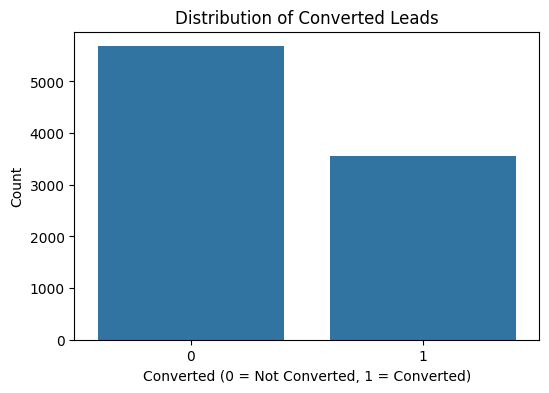

In [21]:
# Plot the distribution of the target variable (Converted)
plt.figure(figsize=(6, 4))
sns.countplot(x='Converted', data=df)
plt.title('Distribution of Converted Leads')
plt.xlabel('Converted (0 = Not Converted, 1 = Converted)')
plt.ylabel('Count')
plt.show()

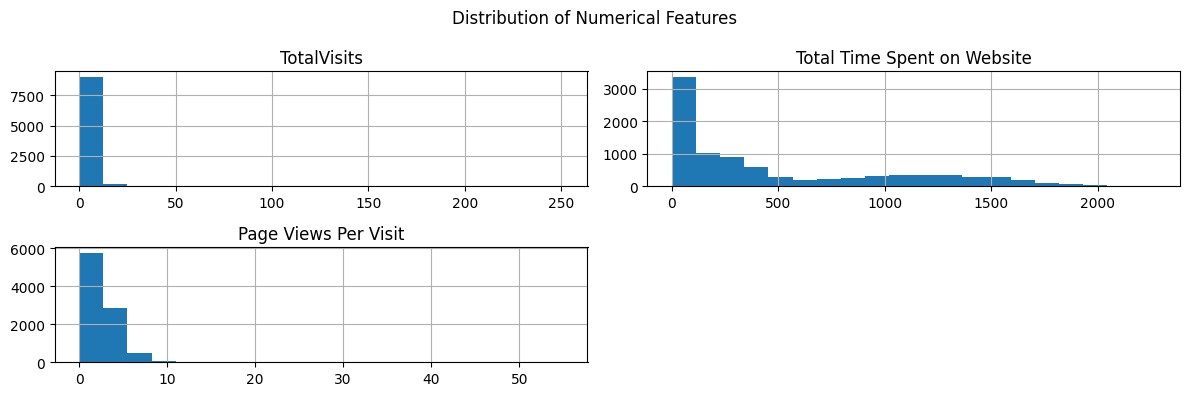

In [22]:
# Plot histograms for numerical features
numerical_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
df[numerical_cols].hist(figsize=(12, 4), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

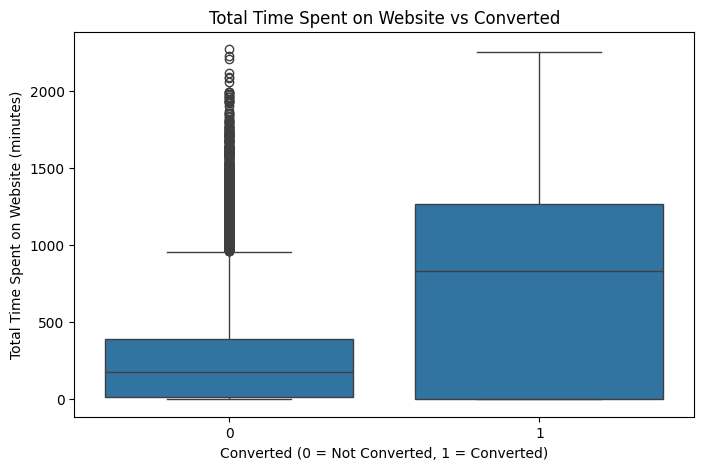

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=df)
plt.title('Total Time Spent on Website vs Converted')
plt.xlabel('Converted (0 = Not Converted, 1 = Converted)')
plt.ylabel('Total Time Spent on Website (minutes)')
plt.show()

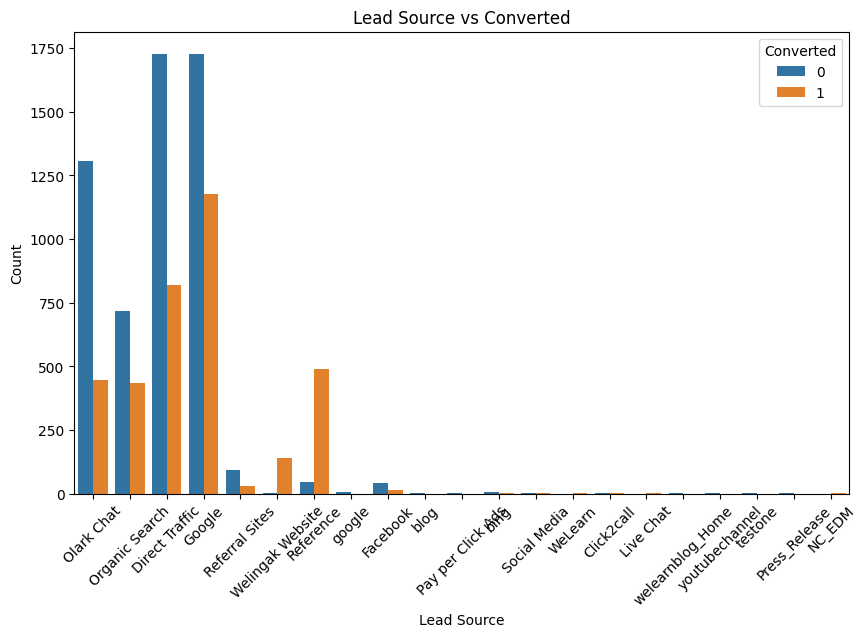

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Lead Source', hue='Converted', data=df)
plt.title('Lead Source vs Converted')
plt.xlabel('Lead Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the cleaned dataset (assuming it's already cleaned as per previous steps)
df = pd.read_csv('dataset/leads.csv')

# Select categorical columns to encode
categorical_cols = ['Lead Source', 'Last Activity', 'Country', 'Specialization', 
                   'How did you hear about X Education', 'What is your current occupation', 
                   'What matters most to you in choosing a course', 'Tags', 'Lead Profile', 'City']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the categorical columns
encoded_cols = encoder.fit_transform(df[categorical_cols])

# Get the feature names from the encoder
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_cols, columns=encoded_feature_names)

# Drop the original categorical columns from df
df = df.drop(columns=categorical_cols)

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Display the first few rows to check
print(df.head())

                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

  Do Not Email Do Not Call  Converted  TotalVisits  \
0           No          No          0          0.0   
1           No          No          0          5.0   
2           No          No          1          2.0   
3           No          No          0          1.0   
4           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit Search  ...  \
0                            0                   0.0     No  ...   
1                          674                   2.5